In [0]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("/content/drive/My Drive/AssignmentFolder/Assignment06/data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]


In [379]:
#최대가 2차원인 항
degree = 2
#X_poly : (x^2 * y) 와 같이, 모든 차수들이 포함되어있는 matrix
#2중 for문을 통해서 구한다
#첫째항은 np.ones인 이유는 theta0값을 그대로 출력하기 위해
X_poly = np.ones(len(pointX))
for i in range(1, degree + 1):  
  for j in range(0, i + 1):
      #dot을 이용하기 위해 column_stack을 이용한다.
      X_poly = np.column_stack((X_poly, (pointX ** (i-j)) * (pointY ** j)))

#X_poly의 차수만큼 theta생성
theta = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)
#위처럼 생성할 경우 matrix생성됨
#squeeze로 list화 시킨다.
theta2 = np.squeeze(theta, 1) 
theta2 = np.array([0, 1, 2, 3, 4, 5])

#sigmoid
z = X_poly.dot(theta2)
sigz = 1 / (1 + np.exp(-z))
#error
E_list = []
E = 0
#accuracy
accurate = 0
accurate_list = []
#기타 상수항
alpha = 0.001
Threshold = 0.00000005
#label transpose & 후에 matrix곱을 위한 matrix화
#np.transpose를 쓰면 error, np.T를 사용한다.
l = np.mat(label).T

iter = 0
while True:      
  #sigmoid
  theta2 = np.squeeze(theta, 1)
  z = X_poly.dot(theta2)
  sigz = 1 / (1 + np.exp(-z))
  #Error
  tmp = E   
  E = np.sum(np.multiply(-label, np.log(sigz)) - np.multiply((1-label), np.log(1-sigz))) / len(label)
  E_list.append(E)
  #accuracy         
  acc = (sigz > 0.5)
  accurate = acc == label
  accurate_list.append((np.sum(accurate) / len(label)) * 100)
  #gradient
  sigz = np.mat(sigz).T
  theta -= alpha * np.dot(X_poly.T, (sigz - l)) / len(label)
  iter += 1
  if abs(tmp - E) < Threshold:     
      break 

print(iter)

725828


In [0]:
x = np.arange(-2, 2, 0.01)  
y = np.arange(-2, 2, 0.01)    
X, Y = np.meshgrid(x, y) 
#meshgrid된 2차원 X, Y를 1차원으로 핀다
X = np.ravel(X)
Y = np.ravel(Y)  
#XY를 위의 X_poly처럼 합쳐준다
XY = np.ones(len(X))
for i in range(1, degree + 1):  
  for j in range(0, i + 1):        
      XY = np.column_stack((XY, (X ** (i-j)) * (Y ** j)))

Z = XY.dot(theta)

#다시 matrix로 되돌린다
X = X.reshape((len(x), len(y)))
Y = Y.reshape((len(x), len(y)))
Z = Z.reshape((len(x), len(y)))

#1. Plot the training data

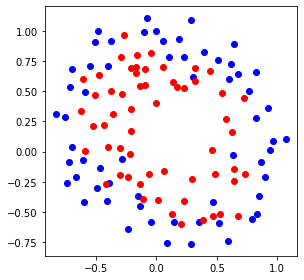

In [381]:
plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#2. Write down the high dimensional function g(x, y; $\theta$) for LaTeX format
사용한 식 : \\
$g(x, y;\theta) = \theta_0 + \theta_1x + \theta_2y + \theta_3x^2 + \theta_4xy + \theta_5y^2$ \\
3차원일 경우 오히려 accuracy가 떨어진다 \\
(6개 항)

#3. Plot the training error

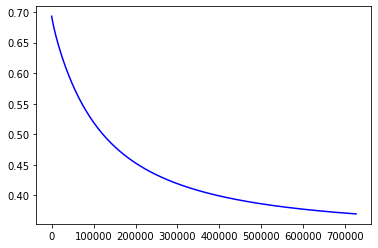

In [382]:
plt.figure() 
plt.plot(E_list, 'blue') 
plt.show()

#4. Plot the training accuracy

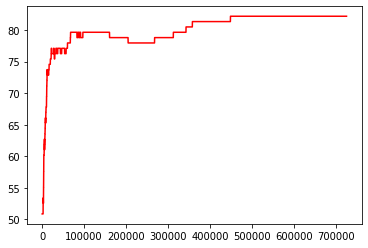

In [383]:
plt.figure() 
plt.plot(accurate_list, 'red') 
plt.show() 

#5. Writedown the final training accuracy

In [384]:
print(accuracy_list[len(accurate_list) - 1], "%")

82.20338983050848 %


#6. Plot the optimal classifier superimposed on training data

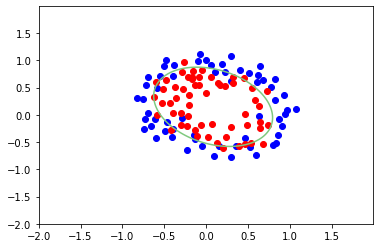

In [385]:
plt.contour(X,Y,Z,levels=[0],cmap= "Accent")  
plt.scatter(pointX0, pointY0, c = 'b')
plt.scatter(pointX1, pointY1, c = 'r')
plt.show()